## Challenge - Air Pollution
It is winter time in Delhi so Cody decided to go for a walk to the news stand and on reaching was surprised to see the air quality index of Delhi in the newspaper . So he decided to collect the air samples of different locations and then took these samples to his lab where he extracted `five features` of the air he collected which can be used to predict the air quality index and combined it with the air quality index given in the newspapers. You are provided with the data collected by Cody and your job is to design a machine learning model , which is given by the features extracted by Cody to predict air quality.


submit file like sample_submittion format :- 

| Id | target|
|-------|-----|
|0 |ans0|
|1 |ans1|
|2 |ans2|
|3 |ans3|
|4 |ans4|
|5 |ans5|
|6 |ans6|

In [179]:
# loading Dataset
import pandas as pd
train = pd.read_csv('Datasets/Assignment2_Train.csv')
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [180]:
train.shape # 5 are features; 1 is target

(1600, 6)

In [181]:
train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

In [182]:
X = train[train.columns[:-1]]
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [183]:
Y = train[train.columns[-1]]
Y.head()

0   -82.154667
1   -48.897960
2    77.270371
3    -2.988581
4   -37.596722
Name: target, dtype: float64

In [184]:
X.shape, Y.shape

((1600, 5), (1600,))

In [185]:
type(X)

pandas.core.frame.DataFrame

In [186]:
import pandas as pd

In [187]:
# preprocessing 
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = pd.DataFrame(s.fit_transform(X))

In [188]:
type(X)

pandas.core.frame.DataFrame

In [189]:
X.describe()

,0,1,2,3,4
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,-2.331468e-17,-1.776357e-17,-1.776357e-17,2.331468e-17,8.881784e-18
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-3.394334e+00,-3.218189e+00,-3.073464e+00,-3.154539e+00,-2.927091e+00
25%,-6.532217e-01,-6.631960e-01,-6.544315e-01,-6.560276e-01,-6.417809e-01
50%,-4.487509e-03,-1.582564e-02,3.151454e-03,1.244233e-02,-2.609701e-02
75%,6.800261e-01,6.589081e-01,6.758504e-01,6.772709e-01,6.522049e-01
max,3.292885e+00,3.393682e+00,3.223719e+00,2.977582e+00,3.383015e+00


In [190]:
Y.describe()

count    1600.000000
mean        0.318835
std       110.741562
min      -379.829794
25%       -71.897040
50%        -0.610665
75%        71.226603
max       337.643014
Name: target, dtype: float64

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape 

((1200, 5), (400, 5), (1200,), (400,))

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
model = LinearRegression()

In [194]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
model.coef_

array([30.32353449, 94.89888429,  8.4056987 , 45.34540165,  2.85925366])

In [196]:
model.intercept_

0.5399143499232448

In [197]:
Y_pred = model.predict(X_test)

In [198]:
model.score(X_test,Y_test)

0.9638051819350817

In [199]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9638051819350817

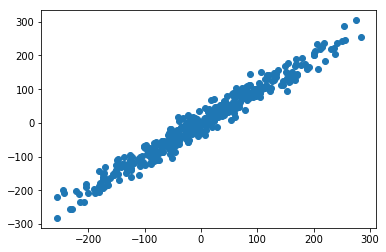

In [200]:
import matplotlib.pyplot as plt 
plt.scatter(Y_test,Y_pred) # approximately linear

In [201]:
# output for test file

# loading 
test = pd.read_csv('Datasets/Assignment2_Test.csv')
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [202]:
s = StandardScaler()
test = pd.DataFrame(s.fit_transform(test))

In [203]:
test.describe()

,0,1,2,3,4
count,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02
mean,4.107825e-17,-1.998401e-17,0.000000,-1.776357e-17,3.552714e-17
std,1.001252e+00,1.001252e+00,1.001252,1.001252e+00,1.001252e+00
min,-2.599839e+00,-2.920746e+00,-2.649386,-2.910034e+00,-2.696222e+00
25%,-7.799843e-01,-6.155405e-01,-0.739297,-6.733676e-01,-6.624141e-01
50%,1.743037e-02,-6.309899e-02,-0.094480,-5.698977e-03,1.741991e-02
75%,7.194538e-01,7.361464e-01,0.735234,6.690070e-01,5.931758e-01
max,3.340367e+00,2.552704e+00,2.806528,2.610345e+00,3.032551e+00


In [204]:
output = model.predict(test)

In [205]:
output.shape

(400,)

In [206]:
type(output)

numpy.ndarray

In [207]:
# adding id to output as given in sample_ submittion format 
ones = []
for i in range(output.shape[0]):
    ones.append(i)
import numpy as np
ones = np.array(ones)    
ones.shape

(400,)

In [208]:
# concatinating ones and ouptut
result = np.column_stack((ones,output))
result.shape

(400, 2)

In [209]:
ones[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [210]:
df = pd.DataFrame(result)
df.head()

,0,1
0,0.0,117.250333
1,1.0,115.850869
2,2.0,-21.858602
3,3.0,-48.398075
4,4.0,-97.347535


In [226]:
# saving into file
np.savetxt('Datasets/Assignment2_output.csv', result , delimiter=',',header = "Id,target",comments='')

In [227]:
pd.read_csv('Datasets/Assignment2_output.csv') # subimtted got 96%

,Id,target
0,0.0,117.250333
1,1.0,115.850869
2,2.0,-21.858602
3,3.0,-48.398075
4,4.0,-97.347535
5,5.0,-45.007259
6,6.0,-79.931905
7,7.0,21.912151
8,8.0,171.800275
9,9.0,172.910459
